# 레이다 차트(Radar Chart)
- 어떤 측정 목표에 대한 평가 항목이 여러 개일 때 항목 수에 따라 원을 같은 간격으로 나누고, 중심으로부터 일정 간격으로 동심으로 척도를 재는 칸을 나누어 각 평가 항목의 정량화된 점수에 따라 그 위치에 점을 찍고 평가항목간 점을 이어 선으로 만들어 항목간 균형을 한눈에 볼 수 있도록 해주는 도표
- 여러 측정 목표를 함께 겹쳐 놓아 비교하기에도 편리, 각 항목 간 비율 뿐만 아니라 균형과 경향을 직관적으로 알 수 있어 편리

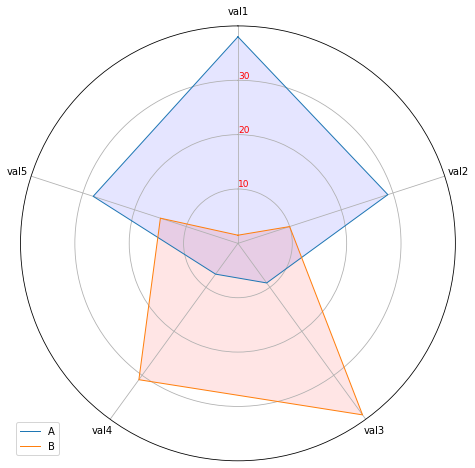

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'group':['A','B','C','D'],
    'val1':[38, 1.5, 30, 4],
    'val2':[29, 10, 9, 34],
    'val3':[9, 39, 23, 24],
    'val4':[7, 31, 33, 14],
    'val5':[28, 15, 32, 14]})

categories = list(df)[1:]
N = len(categories)

angles = [n/float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
# 레이더 플랏의 축을 그림
ax.set_theta_offset(np.pi/2)
# 기준점(10, 20, 30)에 대한 각도를 조정
ax.set_theta_direction(-1)
# 시계방향으로 각도시작을 바꿈
ax.set_rlabel_position(0)
# 기준점(10, 20, 30)을 0의 위치에 둠
plt.xticks(angles[:-1], categories)
# 각 꼭지점의 레이블을 val1, val2로 바꾼다.
plt.yticks([10, 20, 30], ['10','20','30'], color='red', size=9)
# 기준점(10, 20, 30)에 대한 정보를 바꿈
plt.ylim(0, 40)

values = df.loc[0].drop('group').values.flatten().tolist()
# 그룹 A에 대한 영역 지정
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label='A')
ax.fill(angles, values, 'b', alpha=0.1)

values = df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label='B')
ax.fill(angles, values, 'r', alpha=0.1)

plt.legend(bbox_to_anchor=(0.1, 0.1));
# 레이블에 대한 위치를 조정